<a href="https://colab.research.google.com/github/souravsethia/Yelp-Restaurant-Review-Sentimental-Analysis/blob/master/Yelp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Read Text

In [3]:
#pd.set_option('display.max_colwidth', 150)
#stopwords = nltk.corpus.stopwords.words('english')
#ps = nltk.PorterStemmer()

yelp = pd.read_csv('/content/drive/My Drive/Machine Learning/NLP/yelp.csv',encoding = "ISO-8859-1")


In [4]:
import nltk
nltk.download('stopwords')
pd.set_option('display.max_colwidth',150)
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
print("The dataframe has {} rows and {} columns".format(yelp.shape[0], yelp.shape[1]))

The dataframe has 10000 rows and 10 columns


In [6]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grou...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about so...",review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I also dig their candy selection :),review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballpa...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott ...",review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# Create two features punct % & length

In [7]:
def coun_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

yelp['punct %'] = yelp['text'].apply(lambda x: coun_punct(x))
yelp['length'] = yelp['text'].apply(lambda x: len(x) - x.count(" "))

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,punct %,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grou...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,2.9,730
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about so...",review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,3.3,1090
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I also dig their candy selection :),review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,4.9,61
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballpa...",review,uZetl9T0NcROGOyFfughhg,1,2,0,5.2,345
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott ...",review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,9.9,385


In [9]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

yelp['tokens'] = yelp['text'].apply(lambda x: clean_text(x))


In [10]:
pd.set_option('display.max_colwidth',1)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,punct %,length,tokens
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,"My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning. It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary. It was phenomenal and simply the best I've ever had. I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it. It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. It was the best ""toast"" I've ever had.\n\nAnyway, I can't wait to go back!",review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,2.9,730,"[wife, took, birthday, breakfast, excel, weather, perfect, made, sit, outsid, overlook, ground, absolut, pleasur, waitress, excel, food, arriv, quickli, semibusi, saturday, morn, look, like, place, fill, pretti, quickli, earlier, get, better, favor, get, bloodi, mari, phenomen, simpli, best, ive, ever, im, pretti, sure, use, ingredi, garden, blend, fresh, order, amaz, everyth, menu, look, excel, white, truffl, scrambl, egg, veget, skillet, tasti, delici, came, 2, piec, griddl, bread, amaz, absolut, made, meal, complet, best, toast, ive, ever, anyway, cant, wait, go, back]"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small ""Here's The Beef"" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11"" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone better. The calzone does have a sweetish sauce but that's how I like my sauce!\n\nWe had to box part of the pizza to take it home and we were out the door by 6:42. So, everything was great and not like these bad reviewers. That goes to show you that you have to try these things yourself because all these bad reviewers have some serious issues.",review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,3.3,1090,"[idea, peopl, give, bad, review, place, goe, show, pleas, everyon, probabl, gripe, someth, faultther, mani, peopl, like, case, friend, arriv, 550, pm, past, sunday, pretti, crowd, thought, sunday, even, thought, would, wait, forev, get, seat, said, well, seat, girl, come, back, seat, someon, els, seat, 552, waiter, came, got, drink, order, everyon, pleasant, host, seat, us, waiter, server, price, good, well, place, order, decid, want, 602, share, bake, spaghetti, calzon, small, here, beef, pizza, tri, calzon, huge, got, smallest, one, person, got, small, 11, pizza, awesom, friend, like, pizza, better, like, calzon, better, calzon, sweetish, sauc, that, like, sauc, box, ...]"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I also dig their candy selection :),review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,4.9,61,"[lo

In [11]:
yelp.shape

(10000, 13)

In [12]:
yelp.describe()

,stars,cool,useful,funny,punct %,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,4.30711,578.880700
std,1.214636,2.067861,2.336647,1.907942,2.11727,503.062695
min,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,3.20000,240.000000
50%,4.000000,0.000000,1.000000,0.000000,4.00000,441.000000
75%,5.000000,1.000000,2.000000,1.000000,5.00000,757.000000
max,5.000000,77.000000,76.000000,57.000000,84.20000,4140.000000


# As we want to classify reviews as 1 or 5 star we take only that rows

In [13]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_class['text']
X.shape

(4086,)

In [14]:
X

0       My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.\n\nAnyway, I can't wait to go back!                                                                                                 

In [15]:
y = yelp_class['stars']
y

0       5
1       5
3       5
4       5
6       5
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64

In [16]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  4086 non-null   object 
 1   date         4086 non-null   object 
 2   review_id    4086 non-null   object 
 3   stars        4086 non-null   int64  
 4   text         4086 non-null   object 
 5   type         4086 non-null   object 
 6   user_id      4086 non-null   object 
 7   cool         4086 non-null   int64  
 8   useful       4086 non-null   int64  
 9   funny        4086 non-null   int64  
 10  punct %      4086 non-null   float64
 11  length       4086 non-null   int64  
 12  tokens       4086 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 446.9+ KB


# EDA

### Importing Data Visualization Library

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


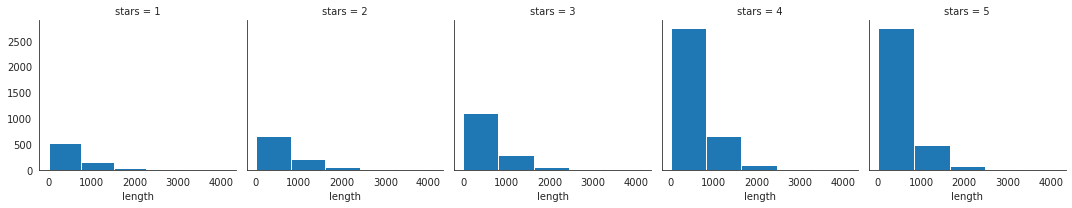

In [18]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'length',bins=5)

### Boxplot of text length for each star category.

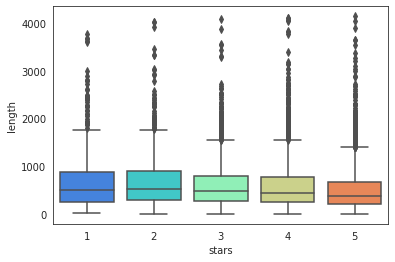

In [19]:
sns.boxplot(x='stars',y='length',data=yelp,palette='rainbow')

### Countplot of the number of occurrences for each type of star rating.

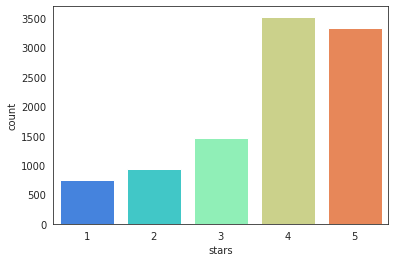

In [20]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

### Mean of numerical columns

In [21]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,punct %,length
stars,,,,,
1,0.576769,1.604806,1.056075,4.351936,671.511348
2,0.719525,1.563107,0.875944,4.216613,684.757282
3,0.788501,1.306639,0.694730,4.286927,616.461328
4,0.954623,1.395916,0.670448,4.250142,581.022689
5,0.944261,1.381780,0.608631,4.391220,509.960743


### Correlation Plot

In [22]:
stars.corr()

,cool,useful,funny,punct %,length
cool,1.000000,-0.743329,-0.944939,0.015484,-0.855591
useful,-0.743329,1.000000,0.894506,-0.083164,0.702189
funny,-0.944939,0.894506,1.000000,-0.051614,0.843223
punct %,0.015484,-0.083164,-0.051614,1.000000,-0.528574
length,-0.855591,0.702189,0.843223,-0.528574,1.000000


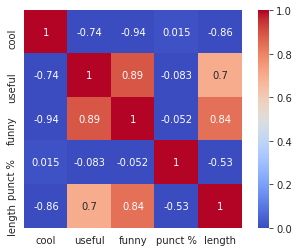

In [23]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True,vmin=0, vmax=1,square = True)

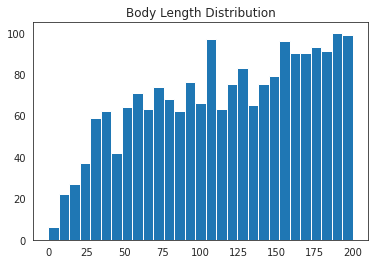

In [24]:
bins = np.linspace(0, 200, 30)

plt.hist(yelp['length'], bins)
plt.title("Body Length Distribution")
plt.show()

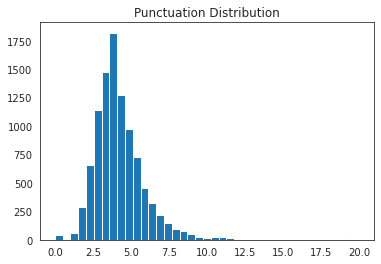

In [25]:
bins = np.linspace(0, 20, 40)

plt.hist(yelp['punct %'], bins)
plt.title("Punctuation Distribution")
plt.show()

# Apply Vectorizer to convert text to numbers

# Apply Count Vectorizer

In [84]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_class['text']
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(yelp_class['text'])
print(X_counts.shape)
#print(count_vect.get_feature_names())

(4086, 16114)


In [27]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16074,16075,16076,16077,16078,16079,16080,16081,16082,16083,16084,16085,16086,16087,16088,16089,16090,16091,16092,16093,16094,16095,16096,16097,16098,16099,16100,16101,16102,16103,16104,16105,16106,16107,16108,16109,16110,16111,16112,16113
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_counts_df, y,test_size=0.3,random_state=101)

##MultinomialNB

In [34]:
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
scores = cross_val_score(nb, X_train, y_train, cv=6, scoring="f1")
scores

array([0.72108844, 0.74172185, 0.74213836, 0.58394161, 0.67132867,
       0.77108434])

##Gaussian NB

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

scores_nb = cross_val_score(nb, X_train, y_train, cv=5, scoring="f1")
scores_nb

array([0.38211382, 0.38735178, 0.33944954, 0.31355932, 0.32743363])

##Support Vector Classifier

In [36]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel="rbf", C=0.025)

scores_svm = cross_val_score(svc_rbf, X_train, y_train, cv=5, scoring="f1")
scores_svm

array([0., 0., 0., 0., 0.])

##Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, max_iter=10000)
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring="f1")
scores

array([0.75789474, 0.7434555 , 0.75675676, 0.73033708, 0.73958333])

##Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=1)

scores_rf = cross_val_score(rfc, X_train, y_train, cv=5, scoring="f1")
scores_rf

array([0.48920863, 0.48571429, 0.51748252, 0.52112676, 0.53424658])

##Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcc = GradientBoostingClassifier( n_estimators=150, max_depth=11)

scores_rf = cross_val_score(gbcc, X_train, y_train, cv=5, scoring="f1")
scores_rf

array([0.63095238, 0.68639053, 0.60122699, 0.625     , 0.66298343])

We see that Logistics Regression has a very good score. Hence, we use this to predict.

In [40]:
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [41]:
matrix=confusion_matrix(y_test,predictions)
print(matrix)
print('\n')
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[168  60]
 [ 22 976]]


0.933115823817292
              precision    recall  f1-score   support

           1       0.88      0.74      0.80       228
           5       0.94      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.86      0.88      1226
weighted avg       0.93      0.93      0.93      1226



In [42]:
gbcc.fit(X_train,y_train)
predictions = gbcc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
matrix=confusion_matrix(y_test,predictions)
print(matrix)
print('\n')
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[136  92]
 [ 21 977]]


0.9078303425774877
              precision    recall  f1-score   support

           1       0.87      0.60      0.71       228
           5       0.91      0.98      0.95       998

    accuracy                           0.91      1226
   macro avg       0.89      0.79      0.83      1226
weighted avg       0.91      0.91      0.90      1226



### Using Grid Search CV

In [44]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,25.498861,0.385475,0.179598,0.001162,None,150,"{'max_depth': None, 'n_estimators': 150}",0.888112,0.882867,0.879371,0.879371,0.877622,0.881469,0.003733,1
11,46.294869,8.683596,0.280386,0.075138,None,300,"{'max_depth': None, 'n_estimators': 300}",0.870629,0.881119,0.870629,0.872378,0.879371,0.874825,0.004505,2
8,47.536905,0.409558,0.296380,0.004629,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.868881,0.879371,0.867133,0.872378,0.875874,0.872727,0.004478,3
9,2.079012,0.061333,0.059828,0.001956,None,10,"{'max_depth': None, 'n_estimators': 10}",0.875874,0.851399,0.875874,0.867133,0.877622,0.869580,0.009803,4
7,23.984765,0.383931,0.175867,0.009211,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.863636,0.875874,0.865385,0.868881,0.867133,0.868182,0.004225,5


# Apply N-gram Vectorization


In [46]:

yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_class['text']

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

yelp_class['cleaned_text'] = yelp_class['text'].apply(lambda x: clean_text(x))
yelp_class.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,punct %,length,tokens,cleaned_text
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,"My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning. It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary. It was phenomenal and simply the best I've ever had. I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it. It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. It was the best ""toast"" I've ever had.\n\nAnyway, I can't wait to go back!",review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,2.9,730,"[wife, took, birthday, breakfast, excel, weather, perfect, made, sit, outsid, overlook, ground, absolut, pleasur, waitress, excel, food, arriv, quickli, semibusi, saturday, morn, look, like, place, fill, pretti, quickli, earlier, get, better, favor, get, bloodi, mari, phenomen, simpli, best, ive, ever, im, pretti, sure, use, ingredi, garden, blend, fresh, order, amaz, everyth, menu, look, excel, white, truffl, scrambl, egg, veget, skillet, tasti, delici, came, 2, piec, griddl, bread, amaz, absolut, made, meal, complet, best, toast, ive, ever, anyway, cant, wait, go, back]",wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semibusi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ive ever im pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came 2 piec griddl bread amaz absolut made meal complet best toast ive ever anyway cant wait go back
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small ""Here's The Beef"" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11"" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone better. The calzone does have a sweetish sauce but that's how I like my sauce!\n\nWe had to box part of the pizza to take it home and we were out the door by 6:42. So, everything was great and not like these bad reviewers. That goes to show you that you have to try these things yourself because all these bad reviewers have some serious issues.",review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,3.3,1090,"[idea, peopl, give, bad, review, place, goe, show, pleas, everyon, probabl, gripe, someth, faultther, mani, peopl, like, case, friend, arriv, 550, pm, past, sunday, pretti, crowd, thought, sunday, even, thought, would, wait, forev, get, seat, said, well, seat, girl, come, back, seat, someon, els, seat, 552, waiter, came, got, drink, order, everyon, pleasant

In [47]:
X_train, X_test, y_train, y_test = train_test_split(yelp_class['cleaned_text'], y,test_size=0.3,random_state=101)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(1,1))
X_new = ngram_vect.fit_transform(X_train).toarray()
X_test_new = ngram_vect.transform(X_test)
print(X_new.shape)
print(X_test_new.shape)
print(y_train.shape)
print(y_test.shape)
#print(ngram_vect.get_feature_names())

(3, 3)
(3, 3)
(3268,)
(818,)


## 1. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(C=1.0, max_iter=10000)
scores = cross_val_score(lr, X_new, y_train, cv=5, scoring="f1")
scores

array([0.75531915, 0.74074074, 0.76086957, 0.73743017, 0.75      ])

In [50]:
lr.fit(X_new,y_train)
predictions = lr.predict(X_test_new)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
matrix=confusion_matrix(y_test,predictions)
print(matrix)
print('\n')
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[168  60]
 [ 27 971]]


0.9290375203915171
              precision    recall  f1-score   support

           1       0.86      0.74      0.79       228
           5       0.94      0.97      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.85      0.88      1226
weighted avg       0.93      0.93      0.93      1226



## 2. Multinomial NB

In [52]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
scores = cross_val_score(nb, X_new, y_train, cv=6, scoring="f1")
scores

array([0.71794872, 0.79268293, 0.77108434, 0.68456376, 0.74358974,
       0.77456647])

In [53]:
nb.fit(X_new,y_train)
predictions = nb.predict(X_test_new)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
matrix=confusion_matrix(y_test,predictions)
print(matrix)
print('\n')
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[161  67]
 [ 24 974]]


0.9257748776508973
              precision    recall  f1-score   support

           1       0.87      0.71      0.78       228
           5       0.94      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## 3. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=1)

scores_rf = cross_val_score(rfc, X_new, y_train, cv=5, scoring="f1")
scores_rf

array([0.50359712, 0.55782313, 0.46808511, 0.5106383 , 0.52702703])

In [56]:
rfc.fit(X_new,y_train)
predictions = rfc.predict(X_test_new)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
matrix=confusion_matrix(y_test,predictions)
print(matrix)
print('\n')
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[105 123]
 [  1 997]]


0.8988580750407831
              precision    recall  f1-score   support

           1       0.99      0.46      0.63       228
           5       0.89      1.00      0.94       998

    accuracy                           0.90      1226
   macro avg       0.94      0.73      0.79      1226
weighted avg       0.91      0.90      0.88      1226



## Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbcc = GradientBoostingClassifier( n_estimators=150, max_depth=11)

scores_rf = cross_val_score(gbcc, X_new, y_train, cv=5, scoring="f1")
scores_rf

array([0.65882353, 0.6626506 , 0.60869565, 0.63803681, 0.67039106])

In [59]:
gbcc.fit(X_new,y_train)
predictions = gbcc.predict(X_test_new)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
matrix=confusion_matrix(y_test,predictions)
print(matrix)
print('\n')
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[133  95]
 [ 23 975]]


0.9037520391517129
              precision    recall  f1-score   support

           1       0.85      0.58      0.69       228
           5       0.91      0.98      0.94       998

    accuracy                           0.90      1226
   macro avg       0.88      0.78      0.82      1226
weighted avg       0.90      0.90      0.90      1226



# Apply TF-IDF

In [61]:

yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_class['text']

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = ([ps.stem(word) for word in tokens if word not in stopwords])
    return text

#yelp_class['cleaned_text'] = yelp_class['text'].apply(lambda x: clean_text(x))
#yelp_class.head()

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp_class[['text', 'length','punct %']], y, test_size=0.2)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

c = TfidfVectorizer(analyzer=clean_text)
X_tfidf_train = c.fit(X_train['text'])

X_train_tf = X_tfidf_train.transform(X_train['text'])
X_test_tf = X_tfidf_train.transform(X_test['text'])

X_train_vect = pd.concat ([X_train[['length','punct %']].reset_index(drop=True), 
                           pd.DataFrame(X_train_tf.toarray())],axis=1)

X_test_vect = pd.concat ([X_test[['length','punct %']].reset_index(drop=True), 
                           pd.DataFrame(X_test_tf.toarray())],axis=1)

X_train_vect.head()

,length,punct %,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,14097,14098,14099,14100,14101,14102,14103,14104,14105,14106,14107,14108,14109,14110,14111,14112,14113,14114,14115,14116,14117,14118,14119,14120,14121,14122,14123,14124,14125,14126,14127,14128,14129,14130,14131,14132,14133,14134,14135,14136
0,914,4.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,7.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,501,3.6,0.0,0.174951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110,3.6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,179,6.7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [79]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect,y_train)
y_pred = rf_model.predict(X_test_vect)

In [80]:
start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

print(confusion_matrix(y_test,y_pred))

Fit time: 9.185 / Predict time: 0.151 ---- Precision: 0.979 / Recall: 0.329 / Accuracy: 0.881
[[ 47  96]
 [  1 674]]


In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('\n')
score=accuracy_score(y_test,y_pred)
print(score)
report=classification_report(y_test,y_pred)
print(report)

[[ 47  96]
 [  2 673]]


0.8801955990220048
              precision    recall  f1-score   support

           1       0.96      0.33      0.49       143
           5       0.88      1.00      0.93       675

    accuracy                           0.88       818
   macro avg       0.92      0.66      0.71       818
weighted avg       0.89      0.88      0.85       818



## XG Boost Classifier

In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, max_depth=10)

In [71]:
xgb.fit(X_train_vect,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('\n')
score=accuracy_score(y_test,y_pred)
print(score)
report=classification_report(y_test,y_pred)
print(report)

[[ 44  99]
 [  0 675]]


0.8789731051344744
              precision    recall  f1-score   support

           1       1.00      0.31      0.47       143
           5       0.87      1.00      0.93       675

    accuracy                           0.88       818
   macro avg       0.94      0.65      0.70       818
weighted avg       0.89      0.88      0.85       818



##GradientBoostingClassifier

In [81]:
import time
from sklearn.metrics import precision_recall_fscore_support as score
gb = GradientBoostingClassifier(n_estimators=150, max_depth=20)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

print(confusion_matrix(y_test,y_pred))

Fit time: 477.775 / Predict time: 0.109 ---- Precision: 0.833 / Recall: 0.524 / Accuracy: 0.899
[[ 75  68]
 [ 15 660]]


In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('\n')
score=accuracy_score(y_test,y_pred)
print(score)
report=classification_report(y_test,y_pred)
print(report)

[[ 75  68]
 [ 15 660]]


0.8985330073349633
              precision    recall  f1-score   support

           1       0.83      0.52      0.64       143
           5       0.91      0.98      0.94       675

    accuracy                           0.90       818
   macro avg       0.87      0.75      0.79       818
weighted avg       0.89      0.90      0.89       818

